# Convex functions

# Gradient Descent

Converged: True


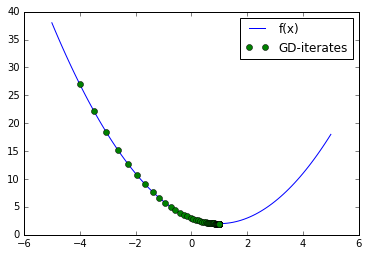

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def gradient_descent(xk,dx_f,gamma):
    return xk-gamma*dx_f
def linear(a,b,x):
    return a*x+b
def quadratic(a,b,c,x):
    return a*x**2+b*x+c
def dx_quadratic(a,b,x):
    return 2*a*x+b
def cubic(a,b,c,d,x):
    return a*x**3+b*x**2+c*x+d
def dx_cubic(a,b,c,x):
    return 3*a*x**2+2*b*x+c

#One variable examples
a,b,c = 1,-2,3
x = np.linspace(-5,5,101)
quad = quadratic(a,b,c,x)
dx_quad = dx_quadratic(a,b,x)

xk = -4
xk_vec = [xk]
fxk_vec = [quadratic(a,b,c,xk)]
gamma = 0.05
iters = 0
max_iters = 200
converged = False

while(abs(dx_quadratic(a,b,xk)) > 1e-6 and iters < max_iters):
    #print(xk, dx_quadratic(a,b,xk), iters)
    xk = gradient_descent(xk,dx_quadratic(a,b,xk),gamma)
    xk_vec.append(xk)
    fxk_vec.append(quadratic(a,b,c,xk))
    iters += 1

if(iters < max_iters):
    converged = True

print"Converged: %s" % converged

plt.figure(1)
plt.plot(x,quad)
plt.plot(xk_vec,fxk_vec,'o')
plt.legend(["f(x)","GD-iterates"])
plt.show()

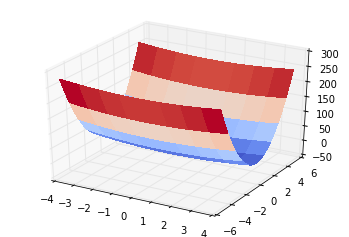

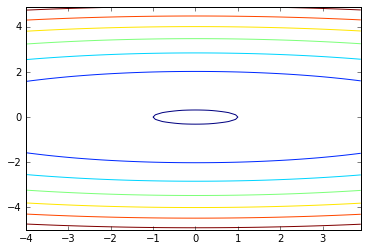

[4.77010127e-07 0.00000000e+00]


In [7]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

#Two variable example
def Z(x,y):
    return x**2+10*y**2-1

def grad_Z(x,y):
    gZ = np.zeros(2)
    gZ[0] = 2*x
    gZ[1] = 20*y
    return gZ

X = np.arange(-4,4,0.1)
Y = np.arange(-5,5,0.1)

X_, Y_ = np.meshgrid(X, Y)
Z_ = Z(X_,Y_)
fig = plt.figure(2)
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X_, Y_, Z_, cmap=cm.coolwarm,linewidth=0, antialiased=False)
plt.show()
plt.figure(3)
plt.contour(X_,Y_,Z_,corner_mask=0)
plt.show()

xk = np.zeros(2)
xk[0] = 1.5
xk[1] = 2.3

gamma = 0.05
iters = 0
max_iters = 200
converged = False
while(abs(np.linalg.norm(grad_Z(xk[0],xk[1]))) > 1e-6 and iters < max_iters):
    #print("xk=%g, yk=%g, iters=%d" % (xk[0],xk[1],iters))
    xk = xk - gamma*grad_Z(xk[0],xk[1])
    iters += 1
print(xk)

# Linear regression/least squares

\begin{equation}
\hat{y} = \theta_0x_0 + \sum_{i=1}^n \theta_i x_i, \ \ \hat{y} = \theta^T \cdot \bar{x}
\end{equation}
where $x_0 \equiv 1$ by convention (?)


The normal equation
\begin{equation}
\hat{\theta} = (X^TX)^{-1} X^Ty
\end{equation}


Number of iterations before convergence: 726
[2.48676635e-10 2.19639862e-10]
[4.14872228 2.86871952]
[4.14872228 2.86871952]


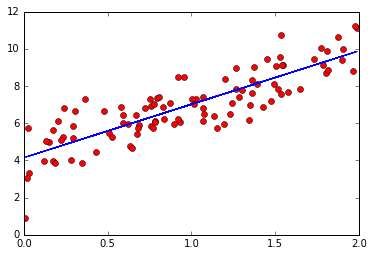

In [14]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

#One variable example
N  = 100
x0 = np.ones(N)
x1 = 2*np.random.rand(N)
y = 4 + 3*x1 + np.random.randn(N)


#Compute theta and predicted y using normal equations
X = np.c_[x0,x1]
Xt_X_inv = np.linalg.inv(np.dot(X.transpose(),X))
Xt_y     = np.dot(X.transpose(),y)
theta_normeqs = np.dot(Xt_X_inv,Xt_y)


#Compute theta using gradient descent
eta = 0.1 
max_iters = 100
theta = np.random.randn(2)

diff = 100
iters = 0
while(diff > 1e-10):
    gradient = 2.0/float(N) * np.dot(X.transpose(), np.dot(X,theta) - y)
    theta = theta-eta*gradient
    diff = np.linalg.norm(gradient)
    iters += 1

#Output number of iterations before convergence and compare theta computed with GD with theta computed 
#using the Normal equations
print("Number of iterations before convergence: %d" % iters)
print(abs(theta_normeqs-theta))
print(theta_normeqs)
print(theta)

#Plot true y and y_predicted
plt.figure(4)
y_pred = theta[0] + theta[1]*x1
plt.plot(x1,y,'ro')
plt.plot(x1,y_pred,'-b')
plt.show()

Number of iterations before convergence: 1109
[4.27115232e-10 2.39355202e-10 1.45479850e-10]
[4.16442678 3.14056098 1.66992613]
[4.16442678 3.14056098 1.66992613]


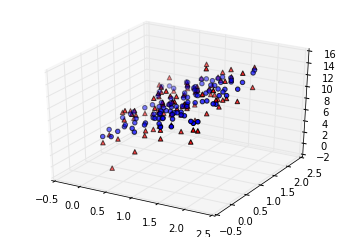

In [5]:
#Two variable example
N = 100
x0 = np.ones(N)
x1 = 2*np.random.rand(N)
x2 = 2*np.random.rand(N)

noise_scale = 2
g_noise = noise_scale*np.random.randn(N)

y = 4+3*x1+2*x2+g_noise

#Compute theta using normal equations
X = np.c_[x0,x1,x2]
Xt_X_inv = np.linalg.inv(np.dot(X.transpose(),X))
Xt_y     = np.dot(X.transpose(),y)
theta_normeqs = np.dot(Xt_X_inv,Xt_y)


#Compute theta using gradient descent
eta = 0.1 
max_iters = 100
theta = np.random.randn(3)

diff = 100
iters = 0
while(diff > 1e-10):
    gradient = 2.0/float(N) * np.dot(X.transpose(), np.dot(X,theta) - y)
    theta = theta-eta*gradient
    diff = np.linalg.norm(gradient)
    iters += 1

#Output number of iterations before convergence and compare theta computed with GD with theta computed 
#using the Normal equations
print("Number of iterations before convergence: %d" % iters)
print(abs(theta_normeqs-theta))
print(theta_normeqs)
print(theta)

#Plot true y and y_predicted
y_pred = theta[0] + theta[1]*x1+theta[2]*x2
fig = plt.figure(5)
ax = fig.gca(projection='3d')
scatter1 = ax.scatter(x1, x2, y,marker='^',c='r')
scatter2 = ax.scatter(x1, x2, y_pred,marker='o',c='b')
plt.show()